In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
dtc = DecisionTreeClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)

In [5]:
_model_ss = StandardScaler()
_model_pca = PCA(n_components=0.9)

In [6]:
df_actual = pd.read_csv('actual.csv')
df_independent = pd.read_csv('data_set_ALL_AML_independent.csv')
df_train = pd.read_csv('data_set_ALL_AML_train.csv')

In [7]:
df_independent.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [8]:
print(df_actual.shape)
df_actual.head()

(72, 2)


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [9]:
df_train = df_train[[_ for _ in df_train.columns if "call" not in _]]
df_train = df_train.T
df_train.drop(['Gene Description', 'Gene Accession Number'],
              axis=0, inplace=True)

print(df_train.shape)
df_train.head()

(38, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [10]:
df_independent = df_independent[[
    _ for _ in df_independent.columns if "call" not in _]]
df_independent = df_independent.T
df_independent.drop(
    ['Gene Description', 'Gene Accession Number'], axis=0, inplace=True)

print(df_independent.shape)
df_independent.head()

(34, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [11]:
df = pd.concat([df_train, df_independent])
df = df.astype(dtype=np.float64)
df['l_type'] = np.array(
    [0 if _ == 'ALL' else 1 for _ in list(df_actual['cancer'])])
print(df.shape)
df.reset_index(drop=True)

(72, 7130)


,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,l_type
0,-214.0,-153.0,-58.0,88.0,-295.0,-558.0,199.0,-176.0,252.0,206.0,...,511.0,-125.0,389.0,-37.0,793.0,329.0,36.0,191.0,-37.0,0
1,-139.0,-73.0,-1.0,283.0,-264.0,-400.0,-330.0,-168.0,101.0,74.0,...,837.0,-36.0,442.0,-17.0,782.0,295.0,11.0,76.0,-14.0,0
2,-76.0,-49.0,-307.0,309.0,-376.0,-650.0,33.0,-367.0,206.0,-215.0,...,1199.0,33.0,168.0,52.0,1138.0,777.0,41.0,228.0,-41.0,0
3,-135.0,-114.0,265.0,12.0,-419.0,-585.0,158.0,-253.0,49.0,31.0,...,835.0,218.0,174.0,-110.0,627.0,170.0,-50.0,126.0,-91.0,0
4,-106.0,-125.0,-76.0,168.0,-230.0,-284.0,4.0,-122.0,70.0,252.0,...,649.0,57.0,504.0,-26.0,250.0,314.0,14.0,56.0,-25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-62.0,-198.0,-5.0,141.0,-256.0,-206.0,-298.0,-218.0,-14.0,100.0,...,532.0,-34.0,239.0,-78.0,707.0,354.0,-22.0,260.0,5.0,0
68,-58.0,-217.0,63.0,95.0,-191.0,-230.0,-86.0,-152.0,-6.0,-249.0,...,297.0,36.0,358.0,2.0,423.0,41.0,0.0,1777.0,-49.0,0
69,-161.0,-215.0,-46.0,146.0,-172.0,-596.0,-122.0,-341.0,171.0,-147.0,...,639.0,-27.0,548.0,-39.0,809.0,445.0,-2.0,210.0,16.0,0
70,-48.0,-531.0,-124.0,431.0,-496.0,-696.0,-1038.0,-441.0,235.0,157.0,...,1141.0,-121.0,197.0,-108.0,466.0,349.0,0.0,284.0,-73.0,0


In [12]:
X = df.drop('l_type', axis=1)
y = df['l_type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)

In [14]:
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

dtc_pred_y = dtc.predict(X_test)
rfc_pred_y = rfc.predict(X_test)

print(confusion_matrix(y_test, dtc_pred_y),
      classification_report(y_test, dtc_pred_y))
print(confusion_matrix(y_test, rfc_pred_y),
      classification_report(y_test, rfc_pred_y))

[[10  2]
 [ 2  8]]               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.80      0.80      0.80        10

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.82      0.82      0.82        22

[[11  1]
 [ 7  3]]               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.75      0.30      0.43        10

    accuracy                           0.64        22
   macro avg       0.68      0.61      0.58        22
weighted avg       0.67      0.64      0.59        22



In [15]:
X_ss = _model_ss.fit_transform(X)
X_ss_pca = _model_pca.fit_transform(X_ss)
X_ss_pca = pd.DataFrame(X_ss_pca)

Text(0, 0.5, 'cumulative explained variance')

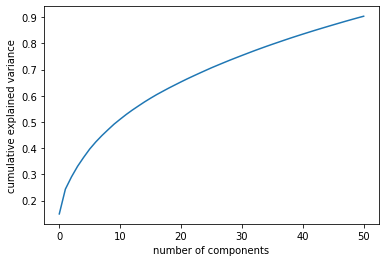

In [16]:
plt.plot(np.cumsum(_model_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ss_pca, y, test_size=0.3, random_state=17)

In [18]:
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

dtc_pred_y = dtc.predict(X_test)
rfc_pred_y = rfc.predict(X_test)

print(confusion_matrix(y_test, dtc_pred_y),
      classification_report(y_test, dtc_pred_y))
print(confusion_matrix(y_test, rfc_pred_y),
      classification_report(y_test, rfc_pred_y))

[[12  0]
 [ 7  3]]               precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.30      0.46        10

    accuracy                           0.68        22
   macro avg       0.82      0.65      0.62        22
weighted avg       0.80      0.68      0.63        22

[[12  0]
 [ 9  1]]               precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       1.00      0.10      0.18        10

    accuracy                           0.59        22
   macro avg       0.79      0.55      0.45        22
weighted avg       0.77      0.59      0.48        22

